### Yeast Dataset

In [6]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Yeast Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Yeast/data/yeast.data',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:9].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

      ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT
0     ADT2_YEAST  0.43  0.67  0.48  0.27   0.5   0.0  0.53  0.22  MIT
1     ADT3_YEAST  0.64  0.62  0.49  0.15   0.5   0.0  0.53  0.22  MIT
2     AAR2_YEAST  0.58  0.44  0.57  0.13   0.5   0.0  0.54  0.22  NUC
3     AATM_YEAST  0.42  0.44  0.48  0.54   0.5   0.0  0.48  0.22  MIT
4     AATC_YEAST  0.51  0.40  0.56  0.17   0.5   0.5  0.49  0.22  CYT
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  ...
1478  YUR1_YEAST  0.81  0.62  0.43  0.17   0.5   0.0  0.53  0.22  ME2
1479  ZIP1_YEAST  0.47  0.43  0.61  0.40   0.5   0.0  0.48  0.47  NUC
1480  ZNRP_YEAST  0.67  0.57  0.36  0.19   0.5   0.0  0.56  0.22  ME2
1481  ZUO1_YEAST  0.43  0.40  0.60  0.16   0.5   0.0  0.53  0.39  NUC
1482  G6PD_YEAST  0.65  0.54  0.54  0.13   0.5   0.0  0.53  0.22  CYT

[1483 rows x 10 columns]
(1483, 9)
(1483,)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
ADT1_YEAST    1483 non-null object
0.58          1483 non-null float64
0.61          1483 non-null float64
0.47          1483 non-null float64
0.13          1483 non-null float64
0.50          1483 non-null float64
0.00          1483 non-null float64
0.48          1483 non-null float64
0.22          1483 non-null float64
MIT           1483 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
Y = labelencoder.fit_transform(Y)
print(X)
print(Y)

[[32 0.43 0.67 ... 0.0 0.53 0.22]
 [33 0.64 0.62 ... 0.0 0.53 0.22]
 [2 0.58 0.44 ... 0.0 0.54 0.22]
 ...
 [1459 0.67 0.57 ... 0.0 0.56 0.22]
 [1460 0.43 0.4 ... 0.0 0.53 0.39]
 [354 0.65 0.54 ... 0.0 0.53 0.22]]
[6 6 7 ... 4 7 0]


In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_encoded = sc.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.33, random_state = 0)

In [19]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB()]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])


Accuracy for KNeighborsClassifier: 56.734693877551024
Accuracy for SVC: 57.55102040816327
Accuracy for DecisionTreeClassifier: 48.97959183673469
Accuracy for RandomForestClassifier: 60.40816326530612
Accuracy for AdaBoostClassifier: 41.83673469387755
Accuracy for LogisticRegression: 58.97959183673469
Accuracy for GaussianNB: 11.224489795918368


Text(0.5, 1.0, 'Yeast dataset models accuracy')

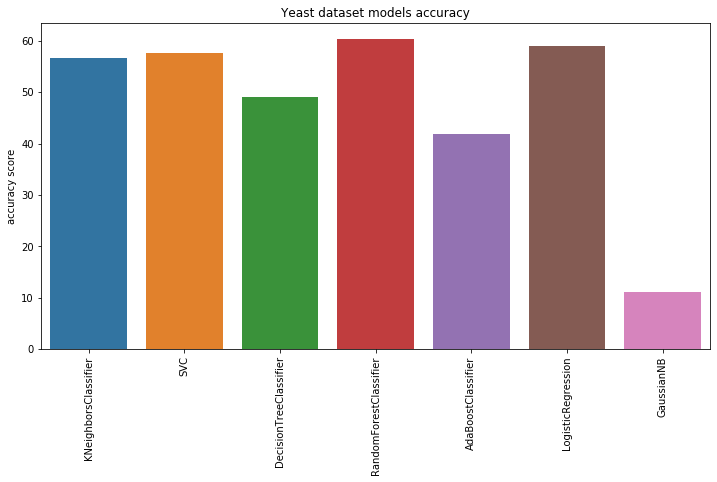

In [21]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Yeast dataset models accuracy')